문제 정의 : 전국에서 신도림동의 연령별 구조가 가장 비슷한 인구 구조는 어느 동네일까?

<strong>한글 깨짐 처리하기</strong>

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


1. 데이터 읽어오기

In [ ]:
import pandas as pd

df = pd.read_csv('/content/age.csv', encoding='cp949', index_col = 0)
df.head(3)

,총인구수,연령구간인구수,2019년02월_계_0세,2019년02월_계_1세,2019년02월_계_2세,2019년02월_계_3세,2019년02월_계_4세,2019년02월_계_5세,2019년02월_계_6세,2019년02월_계_7세,2019년02월_계_8세,2019년02월_계_9세,2019년02월_계_10세,2019년02월_계_11세,2019년02월_계_12세,2019년02월_계_13세,2019년02월_계_14세,2019년02월_계_15세,2019년02월_계_16세,2019년02월_계_17세,2019년02월_계_18세,2019년02월_계_19세,2019년02월_계_20세,2019년02월_계_21세,2019년02월_계_22세,2019년02월_계_23세,2019년02월_계_24세,2019년02월_계_25세,2019년02월_계_26세,2019년02월_계_27세,2019년02월_계_28세,2019년02월_계_29세,2019년02월_계_30세,2019년02월_계_31세,2019년02월_계_32세,2019년02월_계_33세,2019년02월_계_34세,2019년02월_계_35세,2019년02월_계_36세,2019년02월_계_37세,...,2019년02월_계_61세,2019년02월_계_62세,2019년02월_계_63세,2019년02월_계_64세,2019년02월_계_65세,2019년02월_계_66세,2019년02월_계_67세,2019년02월_계_68세,2019년02월_계_69세,2019년02월_계_70세,2019년02월_계_71세,2019년02월_계_72세,2019년02월_계_73세,2019년02월_계_74세,2019년02월_계_75세,2019년02월_계_76세,2019년02월_계_77세,2019년02월_계_78세,2019년02월_계_79세,2019년02월_계_80세,2019년02월_계_81세,2019년02월_계_82세,2019년02월_계_83세,2019년02월_계_84세,2019년02월_계_85세,2019년02월_계_86세,2019년02월_계_87세,2019년02월_계_88세,2019년02월_계_89세,2019년02월_계_90세,2019년02월_계_91세,2019년02월_계_92세,2019년02월_계_93세,2019년02월_계_94세,2019년02월_계_95세,2019년02월_계_96세,2019년02월_계_97세,2019년02월_계_98세,2019년02월_계_99세,2019년02월_계_100세 이상
행정구역,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
서울특별시 (1100000000),9770638,9770638,53738,59599,65815,70726,70037,69000,76377,73745,75639,70189,74217,80273,74774,71529,78329,82561,82083,90416,107254,109552,114315,122473,129497,141673,150625,156258,165662,165771,152776,151006,150177,144503,144300,145260,142644,157624,164934,168159,...,142867,132352,135608,123861,103339,110202,83062,85623,88133,85983,86008,79560,60652,63418,59401,72043,60979,49561,47432,42445,37293,33253,29705,25250,20503,17751,14506,12100,10729,8923,7199,5374,3972,2927,2813,2260,1565,1180,880,5932
서울특별시 종로구 (1111000000),152880,152880,593,683,775,874,852,863,1023,904,1012,923,1004,1151,1084,1005,1099,1180,1171,1338,1528,1767,1899,2122,2193,2454,2438,2572,2682,2598,2446,2234,2206,2161,2060,1949,1888,2149,2116,2219,...,2267,2204,2185,2014,1665,1796,1362,1387,1454,1432,1512,1369,1099,1215,1144,1424,1245,1044,1065,894,763,725,626,572,462,395,336,282,236,199,163,132,112,79,69,81,53,40,39,236
서울특별시 종로구 청운효자동(1111051500),13010,13010,66,79,72,98,98,94,108,109,115,95,125,142,130,105,136,124,134,151,155,147,172,143,181,188,139,163,171,186,151,137,168,157,172,160,162,193,178,232,...,150,138,160,131,132,124,91,103,115,106,119,118,95,103,92,125,94,87,103,83,64,67,62,47,47,31,30,12,21,14,9,8,14,6,7,9,4,2,2,16


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3841 entries, 서울특별시  (1100000000) to 제주특별자치도 서귀포시 예래동(5013062000)
Columns: 103 entries, 총인구수 to 2019년02월_계_100세 이상
dtypes: int64(103)
memory usage: 3.0+ MB


인구수 -> 인구비율로 데이터 전처리

In [ ]:
df.head(3)

,총인구수,연령구간인구수,2019년02월_계_0세,2019년02월_계_1세,2019년02월_계_2세,2019년02월_계_3세,2019년02월_계_4세,2019년02월_계_5세,2019년02월_계_6세,2019년02월_계_7세,2019년02월_계_8세,2019년02월_계_9세,2019년02월_계_10세,2019년02월_계_11세,2019년02월_계_12세,2019년02월_계_13세,2019년02월_계_14세,2019년02월_계_15세,2019년02월_계_16세,2019년02월_계_17세,2019년02월_계_18세,2019년02월_계_19세,2019년02월_계_20세,2019년02월_계_21세,2019년02월_계_22세,2019년02월_계_23세,2019년02월_계_24세,2019년02월_계_25세,2019년02월_계_26세,2019년02월_계_27세,2019년02월_계_28세,2019년02월_계_29세,2019년02월_계_30세,2019년02월_계_31세,2019년02월_계_32세,2019년02월_계_33세,2019년02월_계_34세,2019년02월_계_35세,2019년02월_계_36세,2019년02월_계_37세,...,2019년02월_계_61세,2019년02월_계_62세,2019년02월_계_63세,2019년02월_계_64세,2019년02월_계_65세,2019년02월_계_66세,2019년02월_계_67세,2019년02월_계_68세,2019년02월_계_69세,2019년02월_계_70세,2019년02월_계_71세,2019년02월_계_72세,2019년02월_계_73세,2019년02월_계_74세,2019년02월_계_75세,2019년02월_계_76세,2019년02월_계_77세,2019년02월_계_78세,2019년02월_계_79세,2019년02월_계_80세,2019년02월_계_81세,2019년02월_계_82세,2019년02월_계_83세,2019년02월_계_84세,2019년02월_계_85세,2019년02월_계_86세,2019년02월_계_87세,2019년02월_계_88세,2019년02월_계_89세,2019년02월_계_90세,2019년02월_계_91세,2019년02월_계_92세,2019년02월_계_93세,2019년02월_계_94세,2019년02월_계_95세,2019년02월_계_96세,2019년02월_계_97세,2019년02월_계_98세,2019년02월_계_99세,2019년02월_계_100세 이상
행정구역,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
서울특별시 (1100000000),9770638,9770638,53738,59599,65815,70726,70037,69000,76377,73745,75639,70189,74217,80273,74774,71529,78329,82561,82083,90416,107254,109552,114315,122473,129497,141673,150625,156258,165662,165771,152776,151006,150177,144503,144300,145260,142644,157624,164934,168159,...,142867,132352,135608,123861,103339,110202,83062,85623,88133,85983,86008,79560,60652,63418,59401,72043,60979,49561,47432,42445,37293,33253,29705,25250,20503,17751,14506,12100,10729,8923,7199,5374,3972,2927,2813,2260,1565,1180,880,5932
서울특별시 종로구 (1111000000),152880,152880,593,683,775,874,852,863,1023,904,1012,923,1004,1151,1084,1005,1099,1180,1171,1338,1528,1767,1899,2122,2193,2454,2438,2572,2682,2598,2446,2234,2206,2161,2060,1949,1888,2149,2116,2219,...,2267,2204,2185,2014,1665,1796,1362,1387,1454,1432,1512,1369,1099,1215,1144,1424,1245,1044,1065,894,763,725,626,572,462,395,336,282,236,199,163,132,112,79,69,81,53,40,39,236
서울특별시 종로구 청운효자동(1111051500),13010,13010,66,79,72,98,98,94,108,109,115,95,125,142,130,105,136,124,134,151,155,147,172,143,181,188,139,163,171,186,151,137,168,157,172,160,162,193,178,232,...,150,138,160,131,132,124,91,103,115,106,119,118,95,103,92,125,94,87,103,83,64,67,62,47,47,31,30,12,21,14,9,8,14,6,7,9,4,2,2,16


In [ ]:
df = df.div(df['총인구수'], axis=0) # 전체 데이터를 총 인구수로 나눠서 비율로 변환
df.head(3)

,총인구수,연령구간인구수,2019년02월_계_0세,2019년02월_계_1세,2019년02월_계_2세,2019년02월_계_3세,2019년02월_계_4세,2019년02월_계_5세,2019년02월_계_6세,2019년02월_계_7세,2019년02월_계_8세,2019년02월_계_9세,2019년02월_계_10세,2019년02월_계_11세,2019년02월_계_12세,2019년02월_계_13세,2019년02월_계_14세,2019년02월_계_15세,2019년02월_계_16세,2019년02월_계_17세,2019년02월_계_18세,2019년02월_계_19세,2019년02월_계_20세,2019년02월_계_21세,2019년02월_계_22세,2019년02월_계_23세,2019년02월_계_24세,2019년02월_계_25세,2019년02월_계_26세,2019년02월_계_27세,2019년02월_계_28세,2019년02월_계_29세,2019년02월_계_30세,2019년02월_계_31세,2019년02월_계_32세,2019년02월_계_33세,2019년02월_계_34세,2019년02월_계_35세,2019년02월_계_36세,2019년02월_계_37세,...,2019년02월_계_61세,2019년02월_계_62세,2019년02월_계_63세,2019년02월_계_64세,2019년02월_계_65세,2019년02월_계_66세,2019년02월_계_67세,2019년02월_계_68세,2019년02월_계_69세,2019년02월_계_70세,2019년02월_계_71세,2019년02월_계_72세,2019년02월_계_73세,2019년02월_계_74세,2019년02월_계_75세,2019년02월_계_76세,2019년02월_계_77세,2019년02월_계_78세,2019년02월_계_79세,2019년02월_계_80세,2019년02월_계_81세,2019년02월_계_82세,2019년02월_계_83세,2019년02월_계_84세,2019년02월_계_85세,2019년02월_계_86세,2019년02월_계_87세,2019년02월_계_88세,2019년02월_계_89세,2019년02월_계_90세,2019년02월_계_91세,2019년02월_계_92세,2019년02월_계_93세,2019년02월_계_94세,2019년02월_계_95세,2019년02월_계_96세,2019년02월_계_97세,2019년02월_계_98세,2019년02월_계_99세,2019년02월_계_100세 이상
행정구역,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
서울특별시 (1100000000),1.0,1.0,0.005500,0.006100,0.006736,0.007239,0.007168,0.007062,0.007817,0.007548,0.007741,0.007184,0.007596,0.008216,0.007653,0.007321,0.008017,0.008450,0.008401,0.009254,0.010977,0.011212,0.011700,0.012535,0.013254,0.014500,0.015416,0.015993,0.016955,0.016966,0.015636,0.015455,0.015370,0.014790,0.014769,0.014867,0.014599,0.016132,0.016881,0.017211,...,0.014622,0.013546,0.013879,0.012677,0.010576,0.011279,0.008501,0.008763,0.009020,0.008800,0.008803,0.008143,0.006208,0.006491,0.006080,0.007373,0.006241,0.005072,0.004855,0.004344,0.003817,0.003403,0.003040,0.002584,0.002098,0.001817,0.001485,0.001238,0.001098,0.000913,0.000737,0.000550,0.000407,0.000300,0.000288,0.000231,0.000160,0.000121,0.000090,0.000607
서울특별시 종로구 (1111000000),1.0,1.0,0.003879,0.004468,0.005069,0.005717,0.005573,0.005645,0.006692,0.005913,0.006620,0.006037,0.006567,0.007529,0.007091,0.006574,0.007189,0.007718,0.007660,0.008752,0.009995,0.011558,0.012422,0.013880,0.014345,0.016052,0.015947,0.016824,0.017543,0.016994,0.015999,0.014613,0.014430,0.014135,0.013475,0.012749,0.012350,0.014057,0.013841,0.014515,...,0.014829,0.014417,0.014292,0.013174,0.010891,0.011748,0.008909,0.009072,0.009511,0.009367,0.009890,0.008955,0.007189,0.007947,0.007483,0.009314,0.008144,0.006829,0.006966,0.005848,0.004991,0.004742,0.004095,0.003741,0.003022,0.002584,0.002198,0.001845,0.001544,0.001302,0.001066,0.000863,0.000733,0.000517,0.000451,0.000530,0.000347,0.000262,0.000255,0.001544
서울특별시 종로구 청운효자동(1111051500),1.0,1.0,0.005073,0.006072,0.005534,0.007533,0.007533,0.007225,0.008301,0.008378,0.008839,0.007302,0.009608,0.010915,0.009992,0.008071,0.010453,0.009531,0.010300,0.011606,0.011914,0.011299,0.013221,0.010992,0.013912,0.014450,0.010684,0.012529,0.013144,0.014297,0.011606,0.010530,0.012913,0.012068,0.013221,0.012298,0.012452,0.014835,0.013682,0.017832,...,0.011530,0.010607,0.012298,0.010069,0.010146,0.009531,0.006995,0.007917,0.008839,0.008148,0.009147,0.009070,0.007302,0.007917,0.007071,0.009608,0.007225,0.006687,0.007917,0.006380,0.004919,0.005150,0.004766,0.003613,0.003613,0.002383,0.002306,0.000922,0.001614,0.001076,0.000692,0.000615,0.001076,0.000461,0.000538,0.000692,0.000307,0.000154,0.000154,0.001230


In [ ]:
del df['총인구수'], df['연령구간인구수'] # 총인구수, 연령구간인구수 column 2개 삭제
df.head(3)

,2019년02월_계_0세,2019년02월_계_1세,2019년02월_계_2세,2019년02월_계_3세,2019년02월_계_4세,2019년02월_계_5세,2019년02월_계_6세,2019년02월_계_7세,2019년02월_계_8세,2019년02월_계_9세,2019년02월_계_10세,2019년02월_계_11세,2019년02월_계_12세,2019년02월_계_13세,2019년02월_계_14세,2019년02월_계_15세,2019년02월_계_16세,2019년02월_계_17세,2019년02월_계_18세,2019년02월_계_19세,2019년02월_계_20세,2019년02월_계_21세,2019년02월_계_22세,2019년02월_계_23세,2019년02월_계_24세,2019년02월_계_25세,2019년02월_계_26세,2019년02월_계_27세,2019년02월_계_28세,2019년02월_계_29세,2019년02월_계_30세,2019년02월_계_31세,2019년02월_계_32세,2019년02월_계_33세,2019년02월_계_34세,2019년02월_계_35세,2019년02월_계_36세,2019년02월_계_37세,2019년02월_계_38세,2019년02월_계_39세,...,2019년02월_계_61세,2019년02월_계_62세,2019년02월_계_63세,2019년02월_계_64세,2019년02월_계_65세,2019년02월_계_66세,2019년02월_계_67세,2019년02월_계_68세,2019년02월_계_69세,2019년02월_계_70세,2019년02월_계_71세,2019년02월_계_72세,2019년02월_계_73세,2019년02월_계_74세,2019년02월_계_75세,2019년02월_계_76세,2019년02월_계_77세,2019년02월_계_78세,2019년02월_계_79세,2019년02월_계_80세,2019년02월_계_81세,2019년02월_계_82세,2019년02월_계_83세,2019년02월_계_84세,2019년02월_계_85세,2019년02월_계_86세,2019년02월_계_87세,2019년02월_계_88세,2019년02월_계_89세,2019년02월_계_90세,2019년02월_계_91세,2019년02월_계_92세,2019년02월_계_93세,2019년02월_계_94세,2019년02월_계_95세,2019년02월_계_96세,2019년02월_계_97세,2019년02월_계_98세,2019년02월_계_99세,2019년02월_계_100세 이상
행정구역,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
서울특별시 (1100000000),0.005500,0.006100,0.006736,0.007239,0.007168,0.007062,0.007817,0.007548,0.007741,0.007184,0.007596,0.008216,0.007653,0.007321,0.008017,0.008450,0.008401,0.009254,0.010977,0.011212,0.011700,0.012535,0.013254,0.014500,0.015416,0.015993,0.016955,0.016966,0.015636,0.015455,0.015370,0.014790,0.014769,0.014867,0.014599,0.016132,0.016881,0.017211,0.016667,0.016582,...,0.014622,0.013546,0.013879,0.012677,0.010576,0.011279,0.008501,0.008763,0.009020,0.008800,0.008803,0.008143,0.006208,0.006491,0.006080,0.007373,0.006241,0.005072,0.004855,0.004344,0.003817,0.003403,0.003040,0.002584,0.002098,0.001817,0.001485,0.001238,0.001098,0.000913,0.000737,0.000550,0.000407,0.000300,0.000288,0.000231,0.000160,0.000121,0.000090,0.000607
서울특별시 종로구 (1111000000),0.003879,0.004468,0.005069,0.005717,0.005573,0.005645,0.006692,0.005913,0.006620,0.006037,0.006567,0.007529,0.007091,0.006574,0.007189,0.007718,0.007660,0.008752,0.009995,0.011558,0.012422,0.013880,0.014345,0.016052,0.015947,0.016824,0.017543,0.016994,0.015999,0.014613,0.014430,0.014135,0.013475,0.012749,0.012350,0.014057,0.013841,0.014515,0.014410,0.014240,...,0.014829,0.014417,0.014292,0.013174,0.010891,0.011748,0.008909,0.009072,0.009511,0.009367,0.009890,0.008955,0.007189,0.007947,0.007483,0.009314,0.008144,0.006829,0.006966,0.005848,0.004991,0.004742,0.004095,0.003741,0.003022,0.002584,0.002198,0.001845,0.001544,0.001302,0.001066,0.000863,0.000733,0.000517,0.000451,0.000530,0.000347,0.000262,0.000255,0.001544
서울특별시 종로구 청운효자동(1111051500),0.005073,0.006072,0.005534,0.007533,0.007533,0.007225,0.008301,0.008378,0.008839,0.007302,0.009608,0.010915,0.009992,0.008071,0.010453,0.009531,0.010300,0.011606,0.011914,0.011299,0.013221,0.010992,0.013912,0.014450,0.010684,0.012529,0.013144,0.014297,0.011606,0.010530,0.012913,0.012068,0.013221,0.012298,0.012452,0.014835,0.013682,0.017832,0.018063,0.017371,...,0.011530,0.010607,0.012298,0.010069,0.010146,0.009531,0.006995,0.007917,0.008839,0.008148,0.009147,0.009070,0.007302,0.007917,0.007071,0.009608,0.007225,0.006687,0.007917,0.006380,0.004919,0.005150,0.004766,0.003613,0.003613,0.002383,0.002306,0.000922,0.001614,0.001076,0.000692,0.000615,0.001076,0.000461,0.000538,0.000692,0.000307,0.000154,0.000154,0.001230


2~3. 궁금한 지역 이름 받고 해당 지역의 인구 구조 저장하기

In [ ]:
name = input('인구 구조가 알고 싶은 지역의 이름(읍면동 단위)을 입력해주세요 : ')

a = df.index.str.contains(name) # 3 해당 행의 인덱스를 찾아서 인구 구조를 저장

df2 = df[a] # 인구 구조를 저장
print(df2)
print(df2.T) # 행과 열을 바꾼다  T는 transpose를 의미

인구 구조가 알고 싶은 지역의 이름(읍면동 단위)을 입력해주세요 : 신도림
                            2019년02월_계_0세  ...  2019년02월_계_100세 이상
행정구역                                       ...                    
서울특별시 구로구 신도림동(1153051000)       0.008747  ...            0.000188

[1 rows x 101 columns]
행정구역                서울특별시 구로구 신도림동(1153051000)
2019년02월_계_0세                         0.008747
2019년02월_계_1세                         0.008962
2019년02월_계_2세                         0.010894
2019년02월_계_3세                         0.011082
2019년02월_계_4세                         0.010438
...                                        ...
2019년02월_계_96세                        0.000134
2019년02월_계_97세                        0.000107
2019년02월_계_98세                        0.000054
2019년02월_계_99세                        0.000080
2019년02월_계_100세 이상                    0.000188

[101 rows x 1 columns]


궁금한 지역 인구구조 시각화

행정구역                서울특별시 구로구 신도림동(1153051000)
2019년02월_계_0세                         0.008747
2019년02월_계_1세                         0.008962
2019년02월_계_2세                         0.010894
2019년02월_계_3세                         0.011082
2019년02월_계_4세                         0.010438
...                                        ...
2019년02월_계_96세                        0.000134
2019년02월_계_97세                        0.000107
2019년02월_계_98세                        0.000054
2019년02월_계_99세                        0.000080
2019년02월_계_100세 이상                    0.000188

[101 rows x 1 columns]


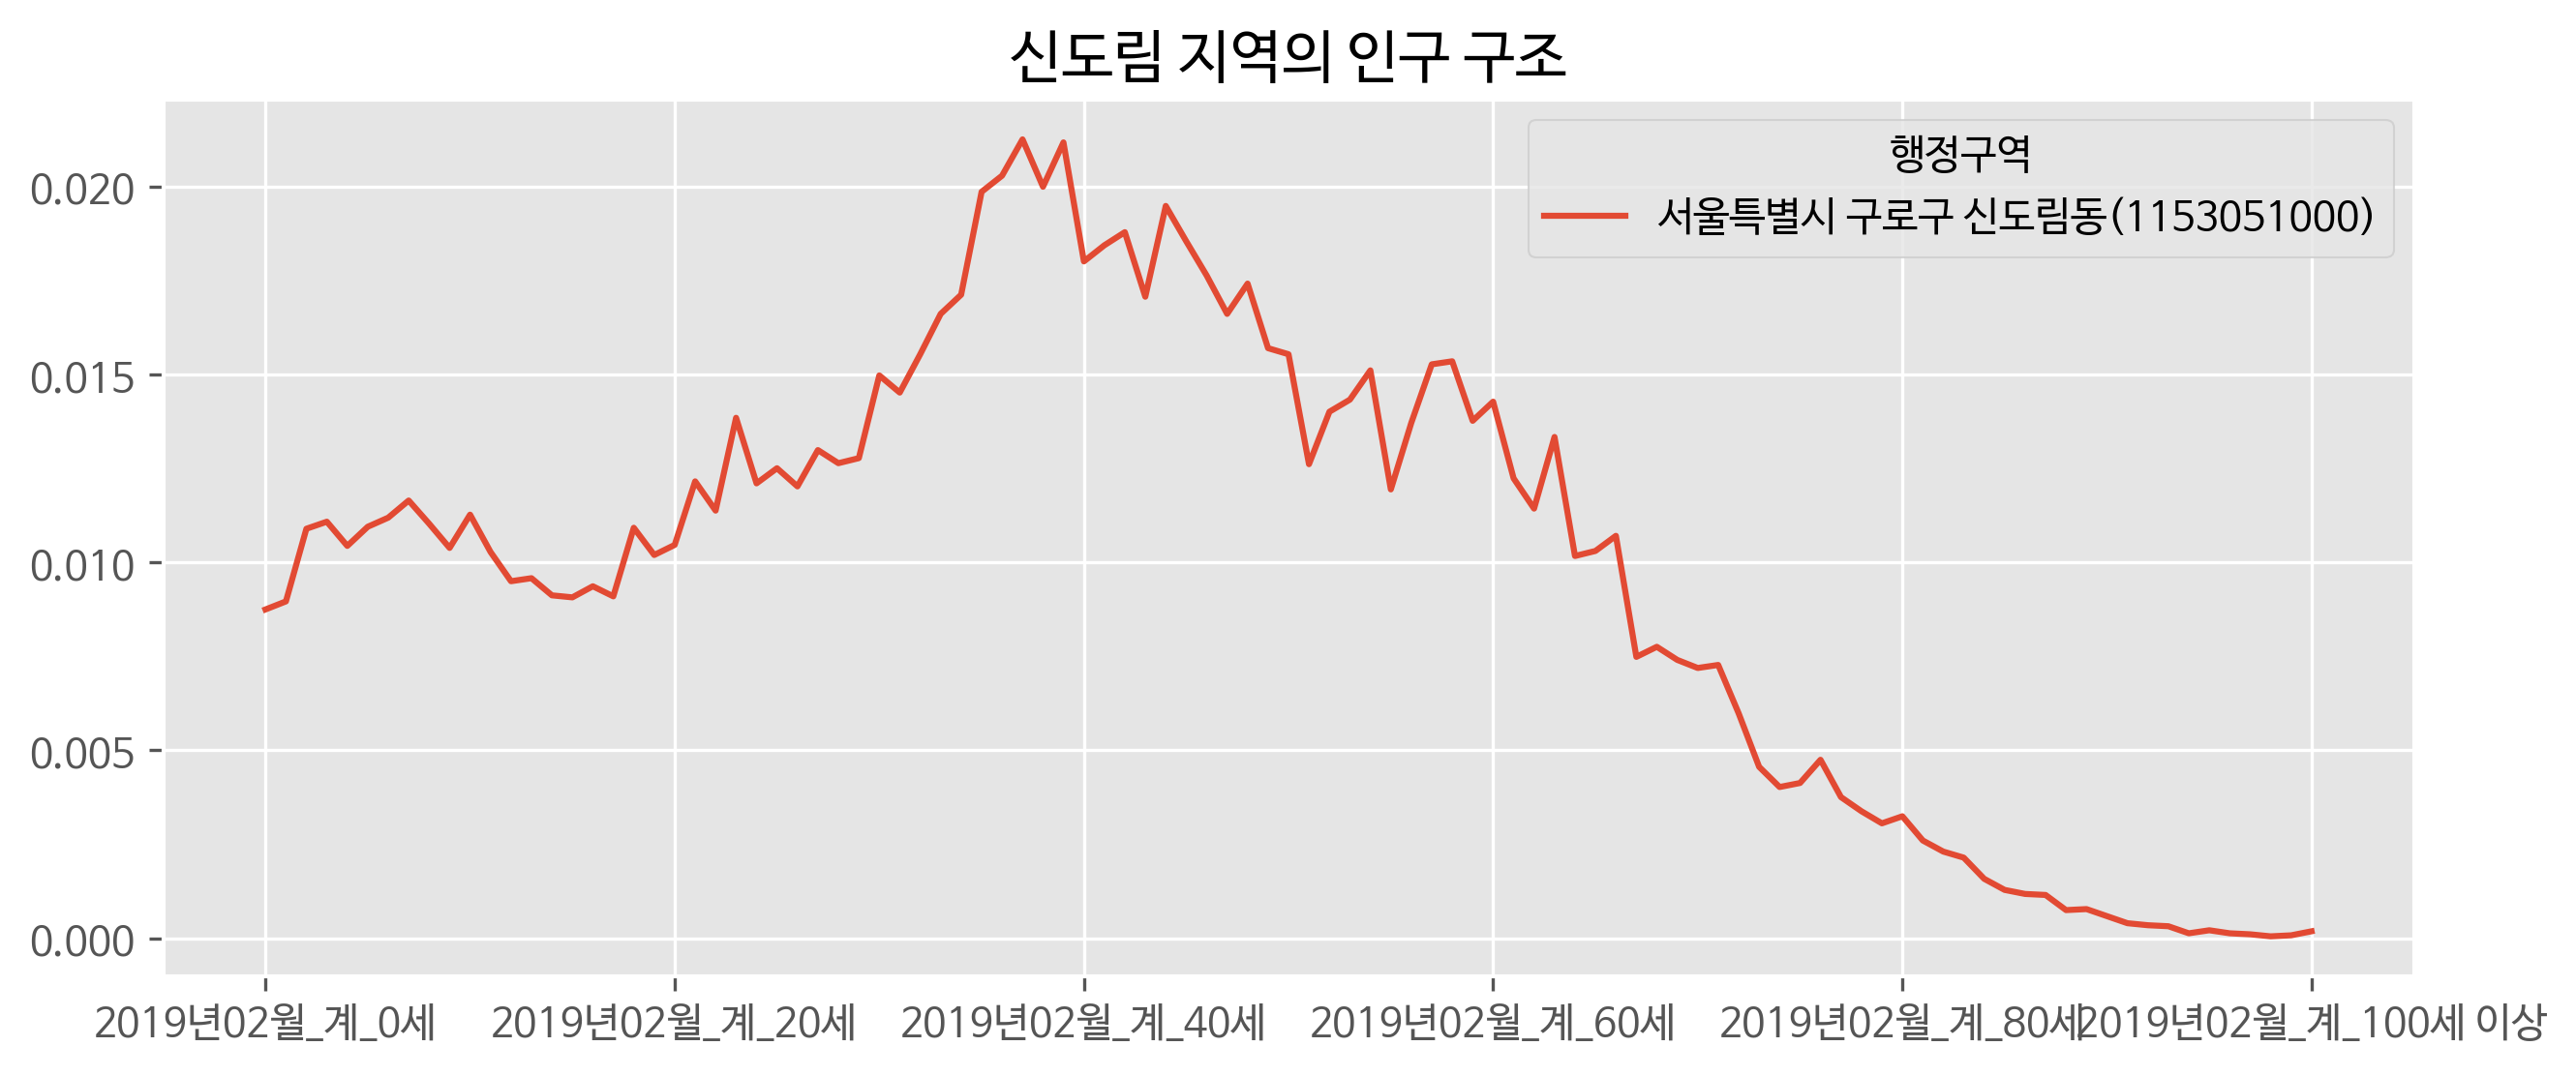

In [ ]:
print(df2.T) # 행과 열을 바꾼다  T는 transpose를 의미

import matplotlib.pyplot as plt

# 차트 설정
plt.rcParams['figure.figsize'] = (10,4)
plt.rcParams['figure.dpi'] = 150
plt.style.use('ggplot') # 스타일 지정
plt.rc('font', family = 'NanumBarunGothic') # 나눔 바른 고딕을 기본 글꼴로 설정 -> 한글 깨짐 처리
# 차트 그리기
df2.T.plot()
plt.title(name + ' 지역의 인구 구조')
plt.show()

In [ ]:
df.head(3)

,2019년02월_계_0세,2019년02월_계_1세,2019년02월_계_2세,2019년02월_계_3세,2019년02월_계_4세,2019년02월_계_5세,2019년02월_계_6세,2019년02월_계_7세,2019년02월_계_8세,2019년02월_계_9세,2019년02월_계_10세,2019년02월_계_11세,2019년02월_계_12세,2019년02월_계_13세,2019년02월_계_14세,2019년02월_계_15세,2019년02월_계_16세,2019년02월_계_17세,2019년02월_계_18세,2019년02월_계_19세,2019년02월_계_20세,2019년02월_계_21세,2019년02월_계_22세,2019년02월_계_23세,2019년02월_계_24세,2019년02월_계_25세,2019년02월_계_26세,2019년02월_계_27세,2019년02월_계_28세,2019년02월_계_29세,2019년02월_계_30세,2019년02월_계_31세,2019년02월_계_32세,2019년02월_계_33세,2019년02월_계_34세,2019년02월_계_35세,2019년02월_계_36세,2019년02월_계_37세,2019년02월_계_38세,2019년02월_계_39세,...,2019년02월_계_61세,2019년02월_계_62세,2019년02월_계_63세,2019년02월_계_64세,2019년02월_계_65세,2019년02월_계_66세,2019년02월_계_67세,2019년02월_계_68세,2019년02월_계_69세,2019년02월_계_70세,2019년02월_계_71세,2019년02월_계_72세,2019년02월_계_73세,2019년02월_계_74세,2019년02월_계_75세,2019년02월_계_76세,2019년02월_계_77세,2019년02월_계_78세,2019년02월_계_79세,2019년02월_계_80세,2019년02월_계_81세,2019년02월_계_82세,2019년02월_계_83세,2019년02월_계_84세,2019년02월_계_85세,2019년02월_계_86세,2019년02월_계_87세,2019년02월_계_88세,2019년02월_계_89세,2019년02월_계_90세,2019년02월_계_91세,2019년02월_계_92세,2019년02월_계_93세,2019년02월_계_94세,2019년02월_계_95세,2019년02월_계_96세,2019년02월_계_97세,2019년02월_계_98세,2019년02월_계_99세,2019년02월_계_100세 이상
행정구역,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
서울특별시 (1100000000),0.005500,0.006100,0.006736,0.007239,0.007168,0.007062,0.007817,0.007548,0.007741,0.007184,0.007596,0.008216,0.007653,0.007321,0.008017,0.008450,0.008401,0.009254,0.010977,0.011212,0.011700,0.012535,0.013254,0.014500,0.015416,0.015993,0.016955,0.016966,0.015636,0.015455,0.015370,0.014790,0.014769,0.014867,0.014599,0.016132,0.016881,0.017211,0.016667,0.016582,...,0.014622,0.013546,0.013879,0.012677,0.010576,0.011279,0.008501,0.008763,0.009020,0.008800,0.008803,0.008143,0.006208,0.006491,0.006080,0.007373,0.006241,0.005072,0.004855,0.004344,0.003817,0.003403,0.003040,0.002584,0.002098,0.001817,0.001485,0.001238,0.001098,0.000913,0.000737,0.000550,0.000407,0.000300,0.000288,0.000231,0.000160,0.000121,0.000090,0.000607
서울특별시 종로구 (1111000000),0.003879,0.004468,0.005069,0.005717,0.005573,0.005645,0.006692,0.005913,0.006620,0.006037,0.006567,0.007529,0.007091,0.006574,0.007189,0.007718,0.007660,0.008752,0.009995,0.011558,0.012422,0.013880,0.014345,0.016052,0.015947,0.016824,0.017543,0.016994,0.015999,0.014613,0.014430,0.014135,0.013475,0.012749,0.012350,0.014057,0.013841,0.014515,0.014410,0.014240,...,0.014829,0.014417,0.014292,0.013174,0.010891,0.011748,0.008909,0.009072,0.009511,0.009367,0.009890,0.008955,0.007189,0.007947,0.007483,0.009314,0.008144,0.006829,0.006966,0.005848,0.004991,0.004742,0.004095,0.003741,0.003022,0.002584,0.002198,0.001845,0.001544,0.001302,0.001066,0.000863,0.000733,0.000517,0.000451,0.000530,0.000347,0.000262,0.000255,0.001544
서울특별시 종로구 청운효자동(1111051500),0.005073,0.006072,0.005534,0.007533,0.007533,0.007225,0.008301,0.008378,0.008839,0.007302,0.009608,0.010915,0.009992,0.008071,0.010453,0.009531,0.010300,0.011606,0.011914,0.011299,0.013221,0.010992,0.013912,0.014450,0.010684,0.012529,0.013144,0.014297,0.011606,0.010530,0.012913,0.012068,0.013221,0.012298,0.012452,0.014835,0.013682,0.017832,0.018063,0.017371,...,0.011530,0.010607,0.012298,0.010069,0.010146,0.009531,0.006995,0.007917,0.008839,0.008148,0.009147,0.009070,0.007302,0.007917,0.007071,0.009608,0.007225,0.006687,0.007917,0.006380,0.004919,0.005150,0.004766,0.003613,0.003613,0.002383,0.002306,0.000922,0.001614,0.001076,0.000692,0.000615,0.001076,0.000461,0.000538,0.000692,0.000307,0.000154,0.000154,0.001230


In [ ]:
df2.iloc[0]

2019년02월_계_0세         0.008747
2019년02월_계_1세         0.008962
2019년02월_계_2세         0.010894
2019년02월_계_3세         0.011082
2019년02월_계_4세         0.010438
                        ...   
2019년02월_계_96세        0.000134
2019년02월_계_97세        0.000107
2019년02월_계_98세        0.000054
2019년02월_계_99세        0.000080
2019년02월_계_100세 이상    0.000188
Name: 서울특별시 구로구 신도림동(1153051000), Length: 101, dtype: float64

In [ ]:
df.sub(df2.iloc[0], axis=1) # home - away

,2019년02월_계_0세,2019년02월_계_1세,2019년02월_계_2세,2019년02월_계_3세,2019년02월_계_4세,2019년02월_계_5세,2019년02월_계_6세,2019년02월_계_7세,2019년02월_계_8세,2019년02월_계_9세,2019년02월_계_10세,2019년02월_계_11세,2019년02월_계_12세,2019년02월_계_13세,2019년02월_계_14세,2019년02월_계_15세,2019년02월_계_16세,2019년02월_계_17세,2019년02월_계_18세,2019년02월_계_19세,2019년02월_계_20세,2019년02월_계_21세,2019년02월_계_22세,2019년02월_계_23세,2019년02월_계_24세,2019년02월_계_25세,2019년02월_계_26세,2019년02월_계_27세,2019년02월_계_28세,2019년02월_계_29세,2019년02월_계_30세,2019년02월_계_31세,2019년02월_계_32세,2019년02월_계_33세,2019년02월_계_34세,2019년02월_계_35세,2019년02월_계_36세,2019년02월_계_37세,2019년02월_계_38세,2019년02월_계_39세,...,2019년02월_계_61세,2019년02월_계_62세,2019년02월_계_63세,2019년02월_계_64세,2019년02월_계_65세,2019년02월_계_66세,2019년02월_계_67세,2019년02월_계_68세,2019년02월_계_69세,2019년02월_계_70세,2019년02월_계_71세,2019년02월_계_72세,2019년02월_계_73세,2019년02월_계_74세,2019년02월_계_75세,2019년02월_계_76세,2019년02월_계_77세,2019년02월_계_78세,2019년02월_계_79세,2019년02월_계_80세,2019년02월_계_81세,2019년02월_계_82세,2019년02월_계_83세,2019년02월_계_84세,2019년02월_계_85세,2019년02월_계_86세,2019년02월_계_87세,2019년02월_계_88세,2019년02월_계_89세,2019년02월_계_90세,2019년02월_계_91세,2019년02월_계_92세,2019년02월_계_93세,2019년02월_계_94세,2019년02월_계_95세,2019년02월_계_96세,2019년02월_계_97세,2019년02월_계_98세,2019년02월_계_99세,2019년02월_계_100세 이상
행정구역,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
서울특별시 (1100000000),-0.003248,-0.002862,-0.004158,-0.003843,-0.003270,-0.003886,-0.003372,-0.004098,-0.003287,-0.003201,-0.003674,-0.002061,-0.001846,-0.002258,-0.001106,-0.000620,-0.000964,0.000158,0.000056,0.001016,0.001235,0.000380,0.001877,0.000654,0.003315,0.003489,0.004934,0.003979,0.002998,0.002683,0.000398,0.000273,-0.000767,-0.001742,-0.002520,-0.003724,-0.003405,-0.004041,-0.003324,-0.004589,...,0.002386,0.002115,0.000543,0.002507,0.000273,0.000573,0.001015,0.001009,0.001614,0.001609,0.001531,0.002159,0.001646,0.002466,0.001947,0.002624,0.002484,0.001692,0.001796,0.001097,0.001214,0.001096,0.000894,0.001001,0.000810,0.000636,0.000331,0.000487,0.000320,0.000323,0.000334,0.000201,0.000085,0.000165,0.000073,0.000097,0.000053,0.000067,0.000010,0.000419
서울특별시 종로구 (1111000000),-0.004869,-0.004495,-0.005825,-0.005365,-0.004865,-0.005303,-0.004498,-0.005732,-0.004409,-0.004347,-0.004702,-0.002748,-0.002408,-0.003005,-0.001934,-0.001351,-0.001705,-0.000344,-0.000926,0.001362,0.001957,0.001725,0.002968,0.002206,0.003846,0.004320,0.005522,0.004007,0.003361,0.001840,-0.000543,-0.000381,-0.002061,-0.003861,-0.004770,-0.005799,-0.006445,-0.006737,-0.005580,-0.006931,...,0.002593,0.002986,0.000956,0.003004,0.000587,0.001042,0.001423,0.001318,0.002105,0.002176,0.002618,0.002971,0.002627,0.003923,0.003351,0.004565,0.004387,0.003448,0.003907,0.002601,0.002388,0.002435,0.001948,0.002158,0.001734,0.001403,0.001044,0.001093,0.000766,0.000711,0.000664,0.000515,0.000411,0.000383,0.000237,0.000396,0.000239,0.000208,0.000175,0.001356
서울특별시 종로구 청운효자동(1111051500),-0.003674,-0.002890,-0.005360,-0.003549,-0.002905,-0.003723,-0.002888,-0.003267,-0.002189,-0.003082,-0.001662,0.000638,0.000494,-0.001509,0.001330,0.000462,0.000935,0.002510,0.000993,0.001103,0.002756,-0.001164,0.002535,0.000605,-0.001417,0.000025,0.001123,0.001310,-0.001032,-0.002242,-0.002059,-0.002449,-0.002316,-0.004311,-0.004667,-0.005021,-0.006604,-0.003419,-0.001927,-0.003800,...,-0.000706,-0.000823,-0.001038,-0.000100,-0.000158,-0.001175,-0.000492,0.000162,0.001434,0.000956,0.001875,0.003086,0.002741,0.003892,0.002939,0.004859,0.003469,0.003306,0.004858,0.003133,0.002317,0.002842,0.002619,0.002029,0.002325,0.001202,0.001152,0.000171,0.000836,0.000486,0.000289,0.000266,0.000754,0.000327,0.000323,0.000558,0.000200,0.000100,0.000073,0.001042
서울특별시 종로구 사직동(1111053000),-0.004261,-0.003745,-0.004216,-0.004091,-0.003447,-0.003644,-0.001381,-0.004863,-0.002472,-0.003706,-0.002088,-0.002660,-0.000317,-0.002275,-0.002445,-0.001244,-0.001330,-0.002001,-0.002469,-0.000180,-0.000552,-0.000678,-0.001673,-0.003099,0.001150,0.000017,0.003734,0.001516,0.001656,0.000375,-0.001721,0.003117,0.000115,-0.003671,-0.004598,-0.005457,-0.00494

In [ ]:
df.sub(df2.iloc[0], axis=1).sum(axis=1)

행정구역
서울특별시  (1100000000)            -5.963112e-18
서울특별시 종로구 (1111000000)         -1.279359e-17
서울특별시 종로구 청운효자동(1111051500)    -1.257675e-17
서울특별시 종로구 사직동(1111053000)      -5.421011e-18
서울특별시 종로구 삼청동(1111054000)      -6.938894e-18
                                    ...     
제주특별자치도 서귀포시 서홍동(5013058000)    2.114194e-18
제주특별자치도 서귀포시 대륜동(5013059000)    7.697835e-18
제주특별자치도 서귀포시 대천동(5013060000)   -4.607859e-18
제주특별자치도 서귀포시 중문동(5013061000)    3.035766e-18
제주특별자치도 서귀포시 예래동(5013062000)    8.456777e-18
Length: 3841, dtype: float64

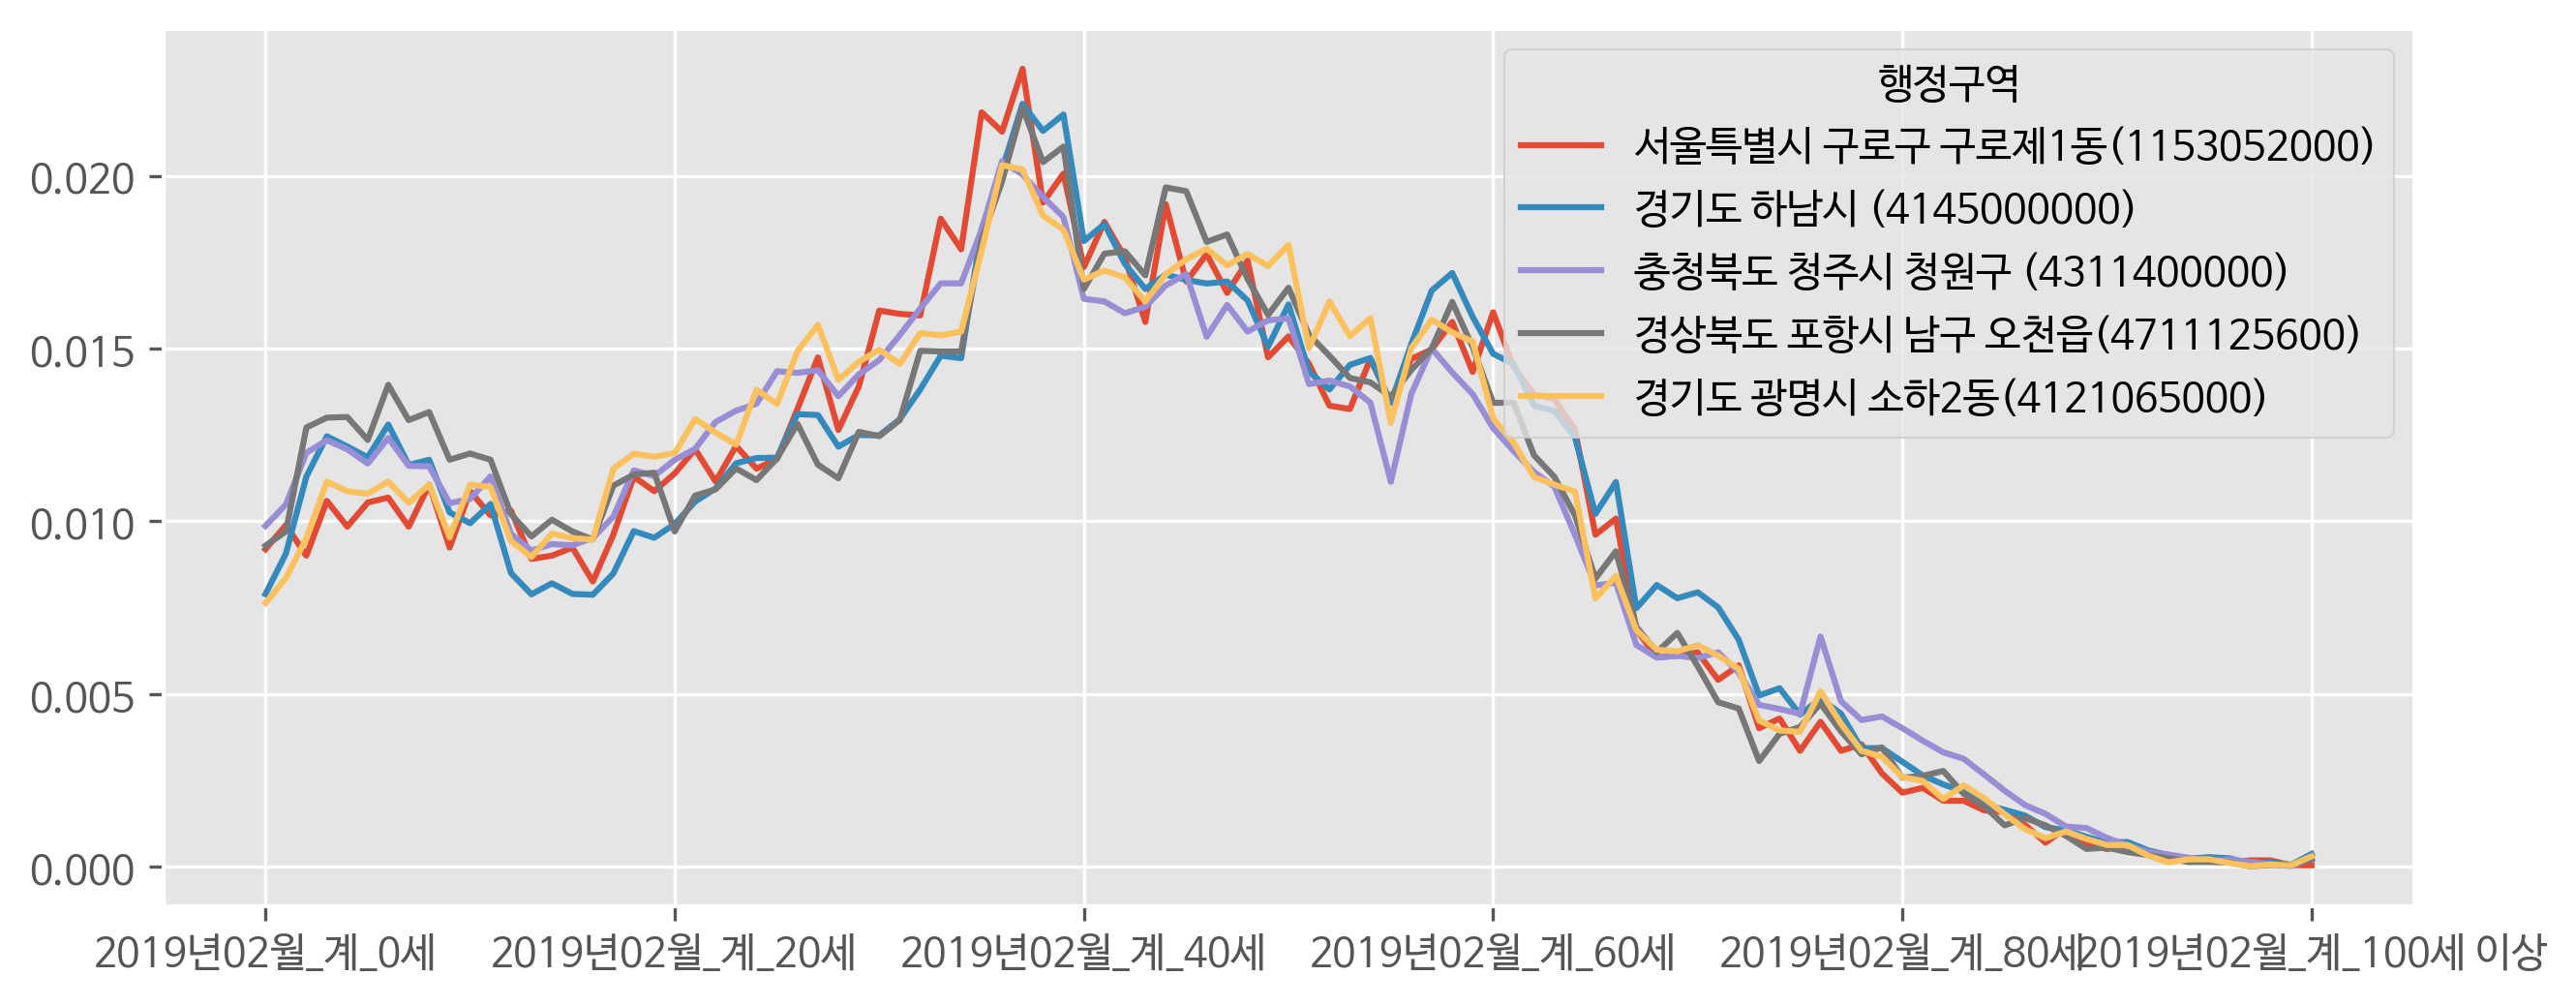

In [ ]:
import numpy as np

df.loc[np.power(df.sub(df2.iloc[0], axis=1), 2).sum(axis=1).sort_values().index[1:6]].T.plot()

총합 버젼

원하는 지역의 이름을 입력해주세요 : 송산2동


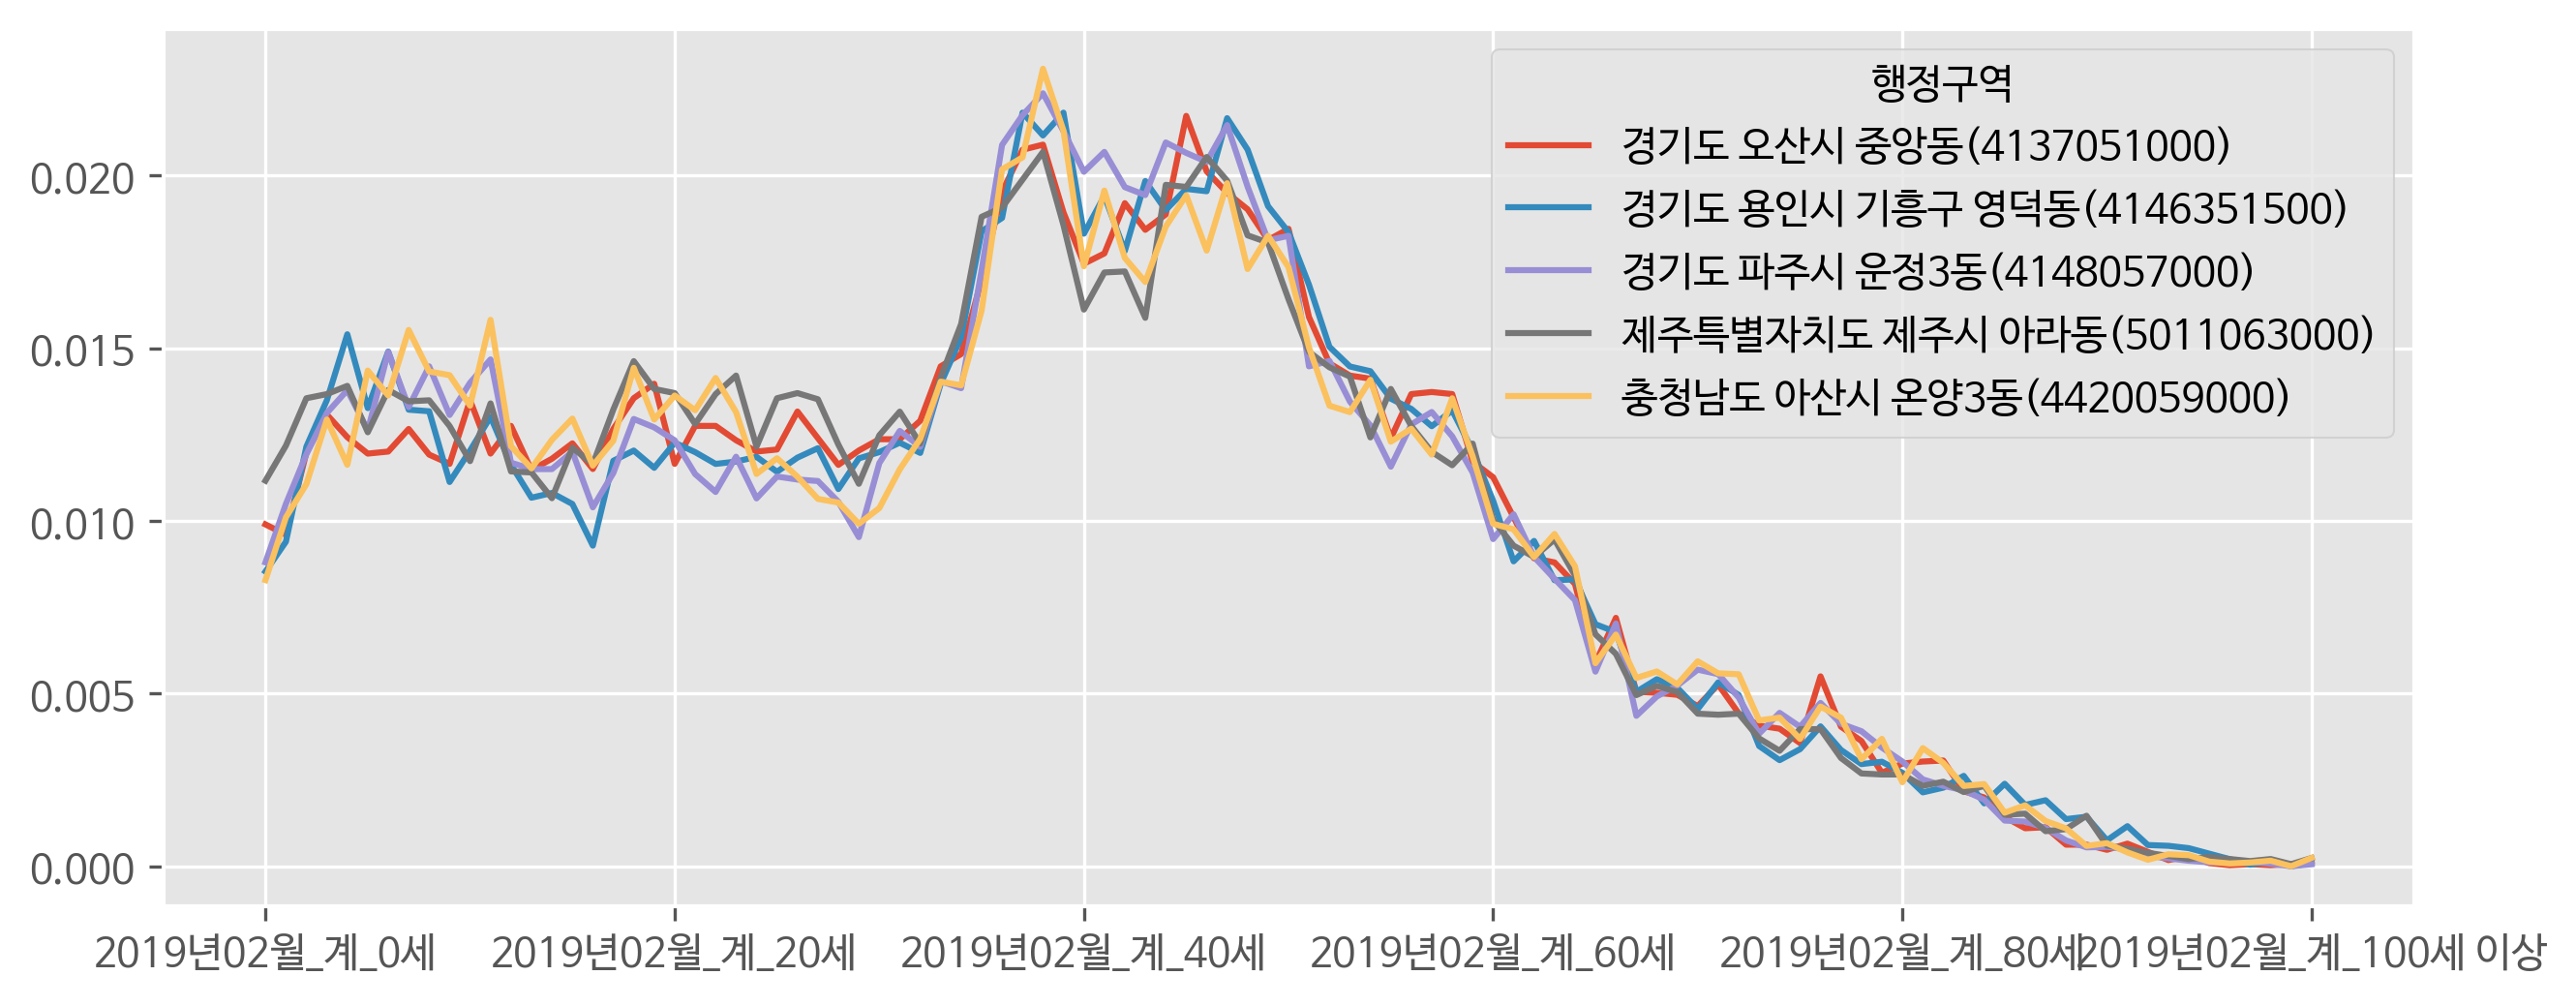

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 차트 스타일 설정
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['figure.figsize'] = (10, 4)
plt.rcParams['figure.dpi'] = 150
plt.style.use('ggplot')

#데이터 가져오기
df = pd.read_csv('age.csv',encoding='cp949', index_col=0)

# 전체 데이터를 총 인구수로 나눠서 비율로 변환
df = df.div(df['총인구수'],axis=0)

# 필요 없는 컬럼 제거
del df['총인구수'], df['연령구간인구수']

# 지역 이름 입력
name = input('원하는 지역의 이름을 입력해주세요 : ')

# 해당 행을 찾아서 해당 지역의 인구 구조를 저장
a = df.index.str.contains(name)
df2 = df[a] #인구 구조를 저장

# 인구 구조가 같은 지역 찾아 지도 시각화 TOP 5 (자기 자신 제외)
df.loc[np.power(df.sub(df2.iloc[0], axis =1), 2).sum(axis = 1).sort_values().index[1:6]].T.plot()
plt.show()